In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("../data/job_train.csv")
print("shape")
data.shape


shape


(8940, 8)

In [3]:
data.head(3)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8940 non-null   object
 1   location          8783 non-null   object
 2   description       8939 non-null   object
 3   requirements      7614 non-null   object
 4   telecommuting     8940 non-null   int64 
 5   has_company_logo  8940 non-null   int64 
 6   has_questions     8940 non-null   int64 
 7   fraudulent        8940 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 558.9+ KB


In [5]:
data.isnull().sum()

title                  0
location             157
description            1
requirements        1326
telecommuting          0
has_company_logo       0
has_questions          0
fraudulent             0
dtype: int64

In [6]:
data[["location","description","requirements"]].head(20)

,location,description,requirements
0,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...
1,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?
2,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...
3,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a..."
4,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...
5,"US, NY, New York",Energy/financial reporter needed in NYCDriven ...,The successful candidate should have a bachelo...
6,"EG, C, Cairo",Role Summary:HR Talent Acquisition Lead will b...,Experienced females are preferred.Relevant exp...
7,"US, IA, Cedar Rapids","Red Star Yeast Company LLC (RSYC), a leader in...",The ideal candidate will be currently enrolled...
8,"DE, BE, Berlin",We are looking for freelance translators (m/f)...,Translation experiencePreferably also a backgr...
9,"US, VA,",We now have a unique product that any physicia...,Proven History of SalesExperince in Medical Sa...


In [7]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,8940.000000,8940.000000,8940.000000,8940.000000
mean,0.043736,0.794407,0.487248,0.051007
std,0.204519,0.404157,0.499865,0.220024
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [8]:
data['fraudulent'].value_counts()

0    8484
1     456
Name: fraudulent, dtype: int64

In [9]:
from sklearn.utils import resample 

fake = data[data.fraudulent == 1]
real = data[data.fraudulent == 0]


num_real, num_fake = data.fraudulent.value_counts()

real_under = real.sample(num_fake)


test_under = pd.concat([real_under, fake], axis=0)

print(test_under.fraudulent.value_counts())


1    456
0    456
Name: fraudulent, dtype: int64


<AxesSubplot:xlabel='Fraudulent', ylabel='value counts'>

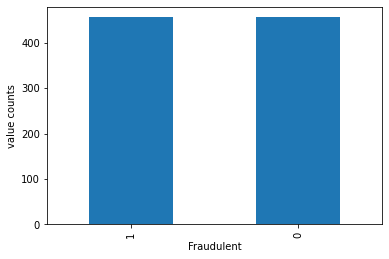

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("Fraudulent")
plt.ylabel("value counts")
data_frame_undersample.fraudulent.value_counts().plot.bar()

In [11]:
Y=test_under['fraudulent']

In [12]:
Y.head()

5257    0
5388    0
5198    0
1773    0
6476    0
Name: fraudulent, dtype: int64

In [13]:
data_withoutNaN=test_under.dropna()

In [14]:
data_withoutNaN.isnull().sum()

title               0
location            0
description         0
requirements        0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [15]:
data_withoutNaN.head(5)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
5257,Ruby on Rails Developers - All Experience Levels!,"GB, LND, London",We are for looking Rails Developers with all t...,We expect:At least 3 years of web development ...,0,1,0,0
5388,Database Architect,"BE, , Brussels",We currently have a vacancy for a Database de...,Your skills:Minimum 14 years of relevant Univ...,0,1,0,0
5198,Software Engineer Backend,"DE, BY, München",We love the idea of building a web service tha...,You have a keen eye for details and the drive ...,0,1,1,0
1773,Software Engineer,"US, OH, Cincin",Are you an experienced software engineer ? We ...,"Deep understanding of HTML5, CSS3 and JavaScri...",0,1,0,0
2524,Account Manager,"US, CA, Burbank",THE COMPANY: CONNECTIVITY (#URL_1fddf30a8cda1e...,EDUCATION: BA/BS preferred or equivalent exper...,0,1,0,0


In [16]:
data_withoutNaN.reset_index(inplace=True)

In [17]:
data_withoutNaN.head(2)

,index,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,5257,Ruby on Rails Developers - All Experience Levels!,"GB, LND, London",We are for looking Rails Developers with all t...,We expect:At least 3 years of web development ...,0,1,0,0
1,5388,Database Architect,"BE, , Brussels",We currently have a vacancy for a Database de...,Your skills:Minimum 14 years of relevant Univ...,0,1,0,0


In [18]:
test_under['text']= test_under['title']+' '+test_under['location']+' '+test_under['description']+' '+test_under['requirements']
#data=data.drop('title',axis=1)
#data=data.drop('description',axis=1)
#data=data.drop('requirements',axis=1)

In [19]:
test_under.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,text
5257,Ruby on Rails Developers - All Experience Levels!,"GB, LND, London",We are for looking Rails Developers with all t...,We expect:At least 3 years of web development ...,0,1,0,0,Ruby on Rails Developers - All Experience Leve...
5388,Database Architect,"BE, , Brussels",We currently have a vacancy for a Database de...,Your skills:Minimum 14 years of relevant Univ...,0,1,0,0,"Database Architect BE, , Brussels We currentl..."
5198,Software Engineer Backend,"DE, BY, München",We love the idea of building a web service tha...,You have a keen eye for details and the drive ...,0,1,1,0,"Software Engineer Backend DE, BY, München We l..."
1773,Software Engineer,"US, OH, Cincin",Are you an experienced software engineer ? We ...,"Deep understanding of HTML5, CSS3 and JavaScri...",0,1,0,0,"Software Engineer US, OH, Cincin Are you an ex..."
6476,"Home Health Aide--Arvada, CO","US, CO, Arvada","Critical Nurse Staffing, Inc. is seeking HHA's...",NaN,0,1,0,0,NaN


In [20]:
data=test_under.drop(['title','description','requirements','location'],axis=1)

In [21]:
data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
5257,0,1,0,0,Ruby on Rails Developers - All Experience Leve...
5388,0,1,0,0,"Database Architect BE, , Brussels We currentl..."
5198,0,1,1,0,"Software Engineer Backend DE, BY, München We l..."
1773,0,1,0,0,"Software Engineer US, OH, Cincin Are you an ex..."
6476,0,1,0,0,NaN


In [22]:
#data.head()
data=data.drop('has_questions',axis=1)
data.head()

,telecommuting,has_company_logo,fraudulent,text
5257,0,1,0,Ruby on Rails Developers - All Experience Leve...
5388,0,1,0,"Database Architect BE, , Brussels We currentl..."
5198,0,1,0,"Software Engineer Backend DE, BY, München We l..."
1773,0,1,0,"Software Engineer US, OH, Cincin Are you an ex..."
6476,0,1,0,NaN


In [23]:
data['has_company_logo'].replace({1:"true",0:"false"},inplace=True)
data.head(2)
data['fraudulent'].replace({0:"Real",1:"Fake"},inplace=True)
data.head(2)

,telecommuting,has_company_logo,fraudulent,text
5257,0,true,Real,Ruby on Rails Developers - All Experience Leve...
5388,0,true,Real,"Database Architect BE, , Brussels We currentl..."


In [24]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","•"]

for char in spec_chars:
    data['text'] = data['text'].str.replace(char, ' ')
    data['text'] = data['text'].str.split().str.join(" ")

In [25]:
import gensim
from gensim.utils import tokenize

In [26]:
#tokenize(data['text'])

In [27]:
data.fraudulent.value_counts()

Real    456
Fake    456
Name: fraudulent, dtype: int64

In [28]:
data['text']=data['text']+' '+data['has_company_logo']
data.head(3)

,telecommuting,has_company_logo,fraudulent,text
5257,0,true,Real,Ruby on Rails Developers All Experience Levels...
5388,0,true,Real,Database Architect BE Brussels We currently ha...
5198,0,true,Real,Software Engineer Backend DE BY München We lov...


In [29]:
data=data.drop('has_company_logo',axis=1)
data.head(3)

,telecommuting,fraudulent,text
5257,0,Real,Ruby on Rails Developers All Experience Levels...
5388,0,Real,Database Architect BE Brussels We currently ha...
5198,0,Real,Software Engineer Backend DE BY München We lov...


In [36]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['fraudulent'],test_size=0.3,random_state=7,shuffle=True)
#print(x_train)

In [38]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.75)
print(tfidf)

TfidfVectorizer(max_df=0.75, stop_words='english')


In [39]:
#vector_for_train=tfidf.fit_transform(x_train.values.encode(utf-8))
#this expects a unicode string

In [40]:
vector_for_train=tfidf.fit_transform(x_train.astype('U'))
#print(vector_for_train)
vector_for_testing=tfidf.transform(x_test.astype('U'))
print(vector_for_testing)

  (0, 6422)	1.0
  (1, 6422)	1.0
  (2, 6422)	1.0
  (3, 10837)	0.06603566413516271
  (3, 10812)	0.03318271833551071
  (3, 10778)	0.022685902719654902
  (3, 10673)	0.04015054511240248
  (3, 10566)	0.0663852857973966
  (3, 10533)	0.17218804120747208
  (3, 10448)	0.05958516399323861
  (3, 10442)	0.06240746954162789
  (3, 10421)	0.04085159342177448
  (3, 10406)	0.05739601373582402
  (3, 10341)	0.04729493037990244
  (3, 10192)	0.01635303598556688
  (3, 10146)	0.046618075675897326
  (3, 10104)	0.08712004743543791
  (3, 10042)	0.051629531481701185
  (3, 10007)	0.03724402872932442
  (3, 9778)	0.042007104129153934
  (3, 9776)	0.043317114124133735
  (3, 9595)	0.04598492038492264
  (3, 9576)	0.03859004060692462
  (3, 9534)	0.043317114124133735
  (3, 9429)	0.04085159342177448
  :	:
  (273, 995)	0.050360649898717864
  (273, 986)	0.03710822587640356
  (273, 949)	0.10820125383354065
  (273, 926)	0.0316207649047741
  (273, 900)	0.04166323003451427
  (273, 831)	0.050360649898717864
  (273, 828)	0.0276263

In [ ]:
plt.imshow(vector_for_testing, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(vector_for_testing)),vector_for_testing.columns, rotation=20)
plt.yticks(range(len(vector_for_testing)),vector_for_testing.index)
plt.show()

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
predictions = []
pred_proba = []
tree=DecisionTreeClassifier(max_depth = 15) 
tree.fit(vector_for_train, y_train) 
predictions = tree.predict(vector_for_testing)
pred_proba = tree.predict_proba(vector_for_testing)
tree.score(vector_for_testing,y_test)
#print(f1_score(y_test,predictions))
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Fake       0.83      0.67      0.74       156
        Real       0.65      0.81      0.72       118

    accuracy                           0.73       274
   macro avg       0.74      0.74      0.73       274
weighted avg       0.75      0.73      0.73       274



In [42]:
pac = PassiveAggressiveClassifier(C = 0.2, random_state = 5)
pac.fit(vector_for_train, y_train)
predictions = pac.predict(vector_for_testing)
print(pac.score(vector_for_testing,y_test))
print(metrics.classification_report(y_test, predictions))

0.7664233576642335
              precision    recall  f1-score   support

        Fake       0.90      0.67      0.76       156
        Real       0.67      0.90      0.77       118

    accuracy                           0.77       274
   macro avg       0.78      0.78      0.77       274
weighted avg       0.80      0.77      0.77       274



In [43]:
from sklearn import svm
model = svm.SVC()
model.fit(vector_for_train, y_train)
predictions = model.predict(vector_for_testing)
print(model.score(vector_for_testing,y_test))
print(metrics.classification_report(y_test, predictions))

0.7554744525547445
              precision    recall  f1-score   support

        Fake       0.95      0.60      0.74       156
        Real       0.65      0.96      0.77       118

    accuracy                           0.76       274
   macro avg       0.80      0.78      0.75       274
weighted avg       0.82      0.76      0.75       274



In [44]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(vector_for_train, y_train)
predictions = knc.predict(vector_for_testing)
print(knc.score(vector_for_testing,y_test))
print(metrics.classification_report(y_test, predictions))

0.7700729927007299
              precision    recall  f1-score   support

        Fake       0.86      0.71      0.78       156
        Real       0.69      0.85      0.76       118

    accuracy                           0.77       274
   macro avg       0.78      0.78      0.77       274
weighted avg       0.79      0.77      0.77       274

